In [1]:
from matplotlib import pyplot as plt
import seaborn
import datetime
import matplotlib.dates as mdates
import math
import random as rn
%matplotlib inline
import numpy as np

In [85]:
numdays = 7

In [89]:
base = datetime.datetime.today()
date_list = [(base - datetime.timedelta(days=x)).date() for x in range(numdays)]
#x = [datetime.datetime.strptime(d,'%m/%d/%Y').date() for d in date_list]
x = [mdates.date2num(d) for d in date_list]
y = [rn.randint(0,10) for _ in range(numdays)]
avg = np.mean(y)
maxx = np.max(y)

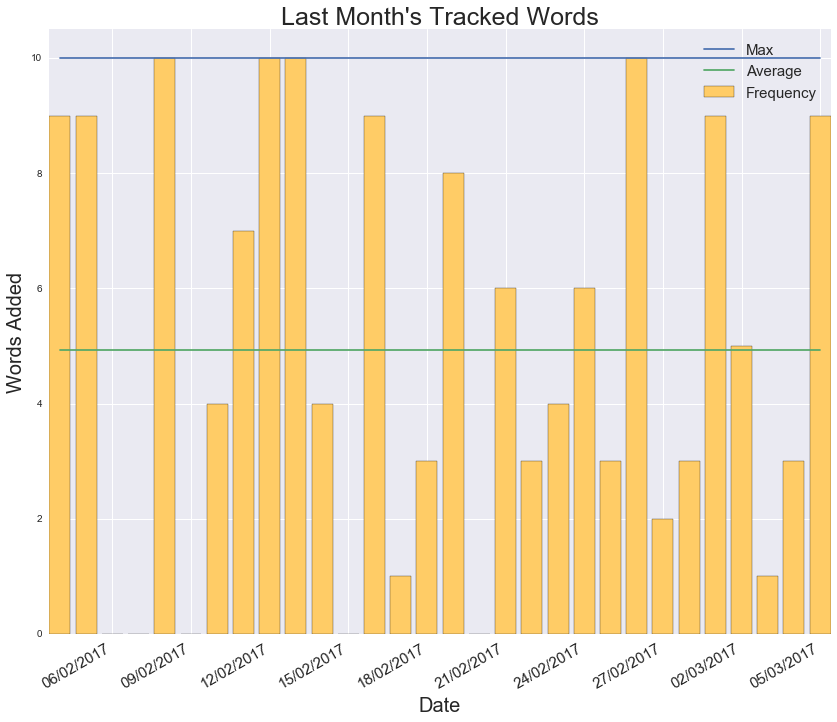

In [4]:
plt.figure(figsize=(14,12))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.bar(x,y,align='center',color='#ffcc66')
plt.xlabel("Date",fontsize=20)
plt.ylabel("Words Added",fontsize=20)
plt.title("Last Month's Tracked Words",fontsize=25)
plt.ylim(min(y),np.max(y)+.5)
plt.xticks(fontsize=15)
plt.gcf().autofmt_xdate()

y1 = [maxx for _ in range(len(x))]
plt.plot(x,y1)
y2 = [avg for _ in range(len(x))]
plt.plot(x,y2)

plt.legend(['Max','Average','Frequency'],fontsize='15')
plt.show()

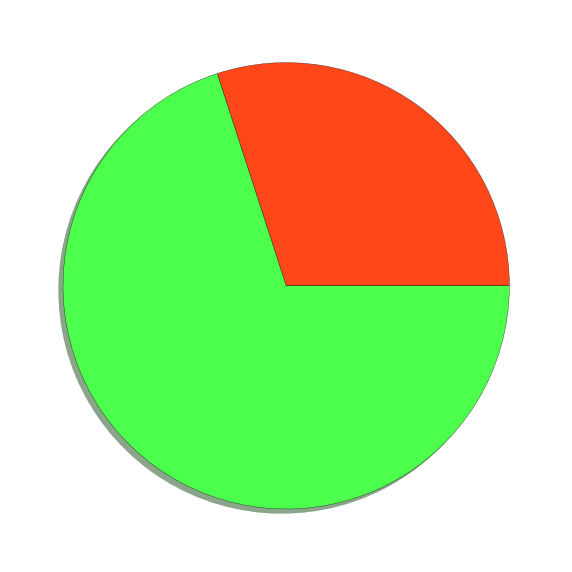

In [25]:
plt.figure(figsize=(10,10))
plt.pie([30,70],shadow=True,colors=['#ff471a','#4dff4d'])
plt.show()

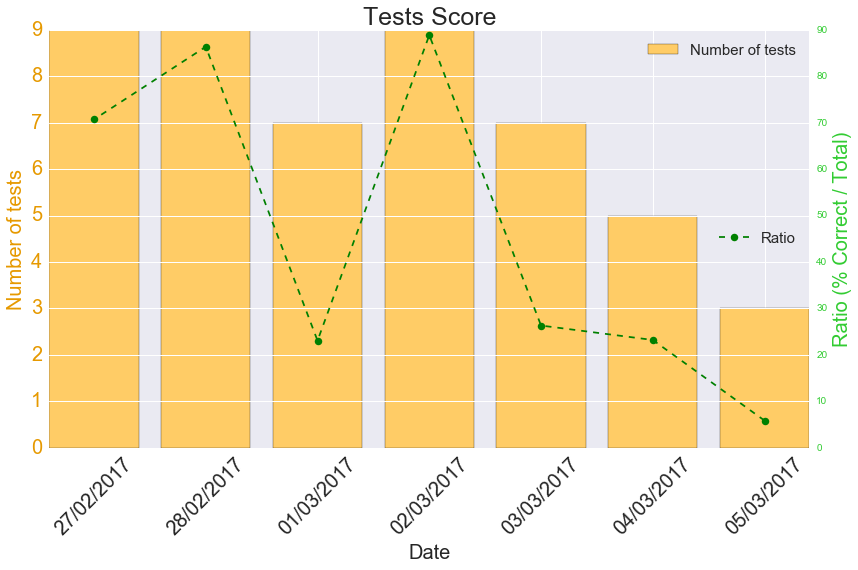

In [104]:
"""
===========================
Plots with different scales
===========================

Demonstrate how to do two plots on the same axes with different left and
right scales.

The trick is to use *two different axes* that share the same *x* axis.
You can use separate `matplotlib.ticker` formatters and locators as
desired since the two axes are independent.

Such axes are generated by calling the `Axes.twinx` method.  Likewise,
`Axes.twiny` is available to generate axes that share a *y* axis but
have different top and bottom scales.

The twinx and twiny methods are also exposed as pyplot functions.

"""

fig, ax1 = plt.subplots()
fig.set_size_inches(12,8)
x = [mdates.date2num(d) for d in date_list]
y = [rn.randint(0,10) for _ in range(numdays)]
maxx = max(y)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.bar(x, y,align='center',color='#ffcc66')
ax1.set_xlabel('Date',fontsize=20)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Number of tests', color='#e69900',fontsize=20)
ax1.tick_params('y', colors='#e69900')
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
    tick.label.set_rotation(45)
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax1.legend(['Number of tests'],fontsize=15)
ax2 = ax1.twinx()
s2 = [rn.random()*100 for _ in range(len(x))]
ax2.plot(x, s2, 'g.--',markersize=15)
ax2.set_ylabel('Ratio (% Correct / Total)', color='#33cc33',fontsize=20)
ax2.tick_params('y', colors='#33cc33')
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
plt.title("Tests Score",fontsize=25)
fig.tight_layout()
ax2.legend(['Ratio'],fontsize='15',loc='center right')
plt.show()